## Decision Tree Analysis (Iris Dataset)

- The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.  
- The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).  
- Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.  

We have used a Decision Tree Classifier to identify the different species.

### Reading the Data and checking the null values

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null values

### Checking the distribution of data

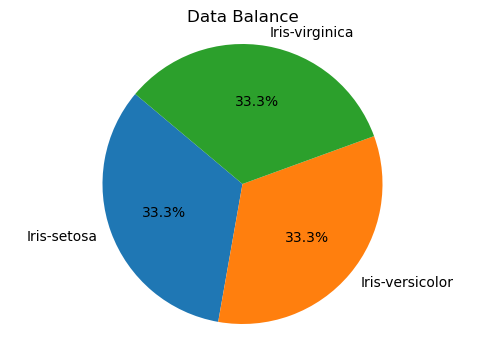

In [4]:
import matplotlib.pyplot as plt

species_counts = df['Species'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Data Balance')
plt.axis('equal')
plt.show()

Data's Balanced

In [5]:
df= df.drop(columns = ['Id']) #We don't need this column for our analysis

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting the data into X and target (y)

In [7]:
X = df.iloc[:, 0:4]

In [8]:
y = df.iloc[:,4]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=17, test_size = 0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier

### Model 1

In [14]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [16]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dtc.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 19  0]
 [ 0  1 13]]


In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [22]:
dtc.feature_importances_

array([0.01170808, 0.03345167, 0.59191048, 0.36292977])

In [23]:
features = pd.DataFrame(dtc.feature_importances_, index= X.columns)

In [24]:
features.head()

,0
SepalLengthCm,0.011708
SepalWidthCm,0.033452
PetalLengthCm,0.591910
PetalWidthCm,0.362930


In [25]:
from sklearn import tree
!pip install graphviz

In [26]:
import graphviz 
dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df") 

'df.pdf'

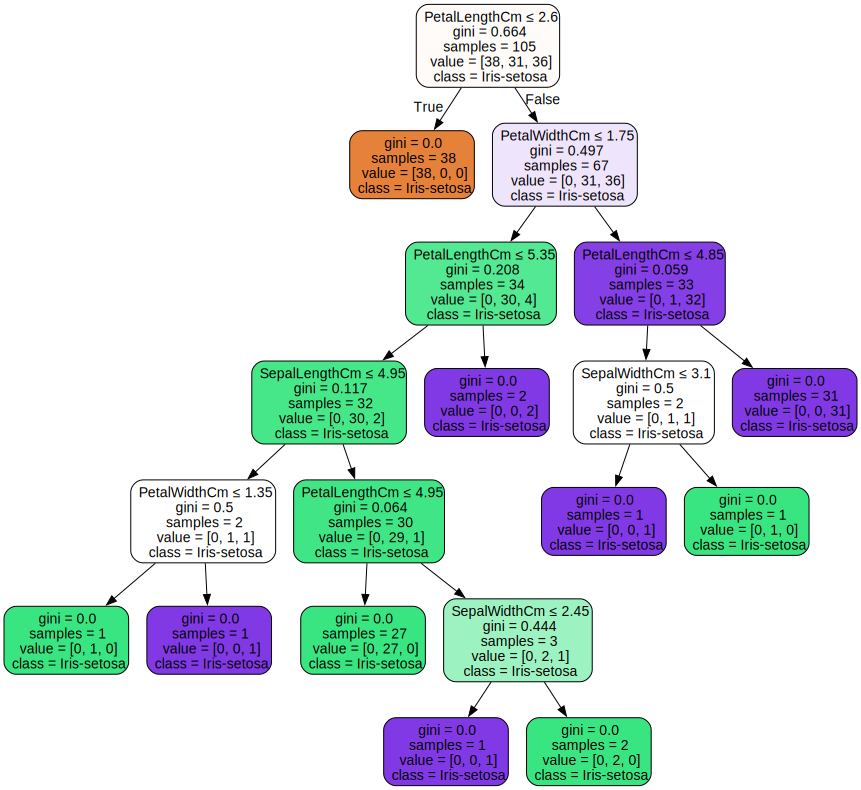

In [27]:
dot_data = tree.export_graphviz(dtc, out_file=None, 
                      feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],  
                      class_names=df.Species,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Model 2

In [28]:
dtc2 = DecisionTreeClassifier(max_depth=4)

In [29]:
dtc2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
y_pred2 = dtc2.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred2))

[[12  0  0]
 [ 0 19  0]
 [ 0  1 13]]


In [33]:
print(classification_report(y_test, y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [34]:
dtc2.feature_importances_

array([0.01496579, 0.        , 0.60891568, 0.37611853])

In [35]:
features2 = pd.DataFrame(dtc2.feature_importances_, index= X.columns)

In [36]:
features2.head()

,0
SepalLengthCm,0.014966
SepalWidthCm,0.000000
PetalLengthCm,0.608916
PetalWidthCm,0.376119


In [37]:

dot_data = tree.export_graphviz(dtc2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df") 

'df.pdf'

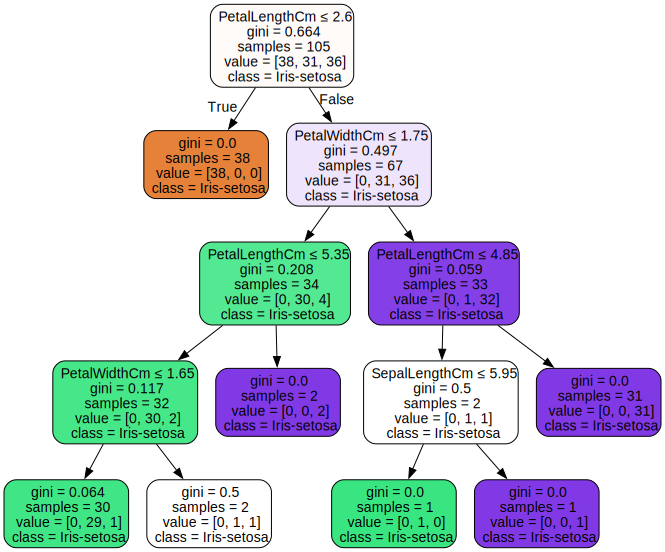

In [38]:
dot_data = tree.export_graphviz(dtc2, out_file=None, 
                      feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],  
                      class_names=df.Species,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

___________________________________________________________________________________________________________________
We can assume that Model 2 gives the same accurate results as Model 1, but the tree is more pruned. The weighted avg. for precision, recall and f1 is 98, showing that this is a good model. 

We also tried decreasing the Max depth and ccp_alpha (0.01), however the False Positives and False Negatives Increased. 